
# <font size=8> Trends in Contraception Awareness and Child Health : Analysis of DHFS Data </font>

Team Details (Group 6)


*   Akshat Johar - 2020A3PS1793H
*   Shaurya Garg - 2020A8PS2215H
*   Saksham Bansal - 2020A3PS2129H







# <font size=7> Data Analysis </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc
df = pd.read_csv('working_dataset.csv')

In [ ]:
# dividing columns into two lists based on the two problem statements
attributes_contraception = ['State','Place Of Residence','Highest Education Level','Wealth Index Combined','Total Children Born','Age of Respondant at first birth','Marriage to first birth interval','Current Contraceptive Method','Reason Of Last Discontinuation','Heard about family planning','Husbands Education Level','Zone']
attributes_child_health = ['State','Place Of Residence','Highest Education Level','Wealth Index Combined','Total Children Born','Size of Child at Birth','Drink Alcohol','Smokes','Anemia Level','Ever had a terminated pregnancy','Age of Respondant at first birth','Heard about family planning','Zone']

In [ ]:
# assigning new columns to the original dataset
new_column_names=['Household Number','State','Place Of Residence','Highest Education Level','Wealth Index Combined','Total Children Born','Age of Respondant at first birth',
                  'Marriage to first birth interval','Ever had a terminated pregnancy','Current Contraceptive Method','Reason Of Last Discontinuation',
                  'Heard about family planning','Anemia Level', 'Smokes','Husbands Education Level','Size of Child at Birth','Drink Alcohol','Zone']

In [ ]:
df.columns = new_column_names
df.head(10)

,Household Number,State,Place Of Residence,Highest Education Level,Wealth Index Combined,Total Children Born,Age of Respondant at first birth,Marriage to first birth interval,Ever had a terminated pregnancy,Current Contraceptive Method,Reason Of Last Discontinuation,Heard about family planning,Anemia Level,Smokes,Husbands Education Level,Size of Child at Birth,Drink Alcohol,Zone
0,54,1,2,2,0.75,2,26,25,0,5,2,1,3,0,2,0.0,0,Northern Zone
1,48,1,2,2,0.25,1,22,12,0,0,14,1,1,0,2,0.5,0,Northern Zone
2,77,1,2,2,0.75,2,19,24,0,0,9,0,2,0,2,0.5,0,Northern Zone
3,98,1,2,2,0.75,2,29,12,0,6,2,0,4,0,2,0.5,0,Northern Zone
4,26,1,2,2,0.50,2,29,12,0,0,10,1,4,0,2,0.5,0,Northern Zone
5,28,1,2,3,1.00,2,22,20,0,5,3,1,4,0,3,0.5,0,Northern Zone
6,24,1,2,2,0.75,2,23,11,0,1,10,1,3,0,2,0.5,0,Northern Zone
7,71,1,2,1,0.25,3,21,18,0,1,9,1,3,0,2,0.5,0,Northern Zone
8,72,1,2,0,0.25,4,21,21,0,0,2,0,3,0,2,0.5,0,Northern Zone
9,8,1,2,0,0.75,4,24,51,0,9,2,0,1,0,0,0.5,0,Northern Zone


# <font size=6>Data Normalization</font>

Normalising relevant columns as a preprocessing step for Cluster Analysis

In [ ]:
to_ignore = ['Household Number','State','Place Of Residence','Total Children Born','Current Contraceptive Method','Reason Of Last Discontinuation','Zone']
for col in df.columns:
    if col not in to_ignore:
        df[col]=(df[col] - df[col].mean())/df[col].std()

In [ ]:
df.head(10)

,Household Number,State,Place Of Residence,Highest Education Level,Wealth Index Combined,Total Children Born,Age of Respondant at first birth,Marriage to first birth interval,Ever had a terminated pregnancy,Current Contraceptive Method,Reason Of Last Discontinuation,Heard about family planning,Anemia Level,Smokes,Husbands Education Level,Size of Child at Birth,Drink Alcohol,Zone
0,54,1,2,0.301488,0.805625,2,1.138888,-0.123870,-0.424189,5,2,0.911666,-0.178722,-0.054494,0.171874,-2.712218,-0.167806,Northern Zone
1,48,1,2,0.301488,-0.633943,1,0.080369,-0.216716,-0.424189,0,14,0.911666,-1.730325,-0.054494,0.171874,0.179958,-0.167806,Northern Zone
2,77,1,2,0.301488,0.805625,2,-0.713520,-0.131012,-0.424189,0,9,-1.096081,-0.954523,-0.054494,0.171874,0.179958,-0.167806,Northern Zone
3,98,1,2,0.301488,0.805625,2,1.932777,-0.216716,-0.424189,6,2,-1.096081,0.597080,-0.054494,0.171874,0.179958,-0.167806,Northern Zone
4,26,1,2,0.301488,0.085841,2,1.932777,-0.216716,-0.424189,0,10,0.911666,0.597080,-0.054494,0.171874,0.179958,-0.167806,Northern Zone
5,28,1,2,1.383959,1.525409,2,0.080369,-0.159580,-0.424189,5,3,0.911666,0.597080,-0.054494,1.236230,0.179958,-0.167806,Northern Zone
6,24,1,2,0.301488,0.805625,2,0.344999,-0.223858,-0.424189,1,10,0.911666,-0.178722,-0.054494,0.171874,0.179958,-0.167806,Northern Zone
7,71,1,2,-0.780982,-0.633943,3,-0.184261,-0.173864,-0.424189,1,9,0.911666,-0.178722,-0.054494,0.171874,0.179958,-0.167806,Northern Zone
8,72,1,2,-1.863453,-0.633943,4,-0.184261,-0.152438,-0.424189,0,2,-1.096081,-0.178722,-0.054494,0.171874,0.179958,-0.167806,Northern Zone
9,8,1,2,-1.863453,0.805625,4,0.609628,0.061824,-0.424189,9,2,-1.096081,-1.730325,-0.054494,-1.956839,0.179958,-0.167806,Northern Zone


# <font size=7>Contraception Awareness Analysis</font>



# <font size=6>Data Analysis: K-Means Clustering</font>

In [ ]:
# 2D cluster analysis between total children ever born and current contraceptive method
columns = ['Total Children Born','Current Contraceptive Method']
df1 = df[columns]
df1.info()
data = df1.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Total Children Born           1350 non-null   int64
 1   Current Contraceptive Method  1350 non-null   int64
dtypes: int64(2)
memory usage: 21.2 KB


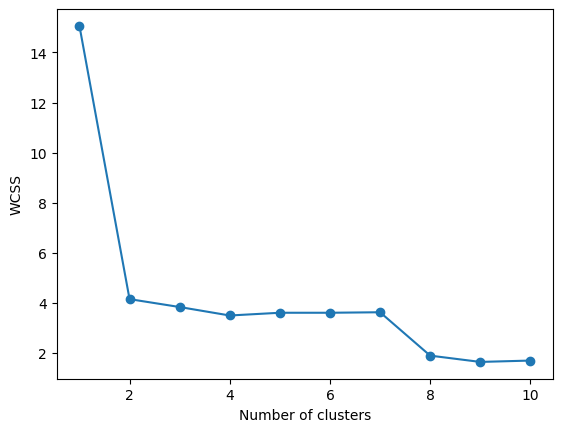

The optimal number of clusters is 6


In [ ]:
# Define a function to calculate the WCSS
def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(data)):
        centroid = centroids[labels[i]]
        distance = np.linalg.norm(data[i] - centroid)
        wcss += distance ** 2
    return wcss / len(data)

# Compute the WCSS values for a range of cluster numbers
wcss_values = []
for k in range(1, 11):
    centroids = np.random.rand(k, 2)  # Initialize centroids randomly
    labels = np.zeros(len(data), dtype=int)  # Initialize labels as zeros
    for _ in range(10):  # Run k-means for 10 iterations
        # Assign each data point to its closest centroid
        for i in range(len(data)):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)
        # Update the centroids to the mean of their assigned points
        for j in range(k):
            points = data[labels == j]
            if len(points) > 0:
                centroids[j] = np.mean(points, axis=0)
        # Calculate the WCSS for the current iteration
        wcss = calculate_wcss(data, centroids, labels)
    wcss_values.append(wcss)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Identify the elbow point
second_derivatives = np.gradient(np.gradient(wcss_values))
elbow_point = np.argmax(second_derivatives < 1e-4) + 1

# Choose the optimal number of clusters
print(f'The optimal number of clusters is {elbow_point}')

In [ ]:
df1.columns=['x','y']


In [ ]:
# Running K-Means Clustering with desired number of clusters
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

# Define the k-means clustering algorithm
def kmeans(df1, k, iterations=100):
    # Initialize k random centroids
    centroids = []
    for i in range(k):
        centroid = [random.uniform(min(df1[x]), max(df1[x])) for x in df1.columns]
        centroids.append(centroid)
    
    # Perform k-means clustering
    for i in range(iterations):
        # Assign each data point to the nearest centroid
        clusters = {}
        for j in range(k):
            clusters[j] = []
        for index, row in df1.iterrows():
            distances = [math.sqrt(sum([(row[x]-centroids[j][x])**2 for x in range(len(row))])) for j in range(k)]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(index)
        
        # Update the centroids
        for j in range(k):
            if clusters[j]:
                centroids[j] = [sum(df1.iloc[clusters[j]][x])/len(clusters[j]) for x in df1.columns]
    
    # Return the cluster assignments and final centroids
    return clusters, centroids


clusters, centroids = kmeans(df1, elbow_point)

In [ ]:
print(f'Total Points in Dataset {len(df1)}')
for i in range(elbow_point):
  print(f'Cluster {i+1} has {len(clusters[i])} data points')



Total Points in Dataset 1350
Cluster 1 has 43 data points
Cluster 2 has 78 data points
Cluster 3 has 577 data points
Cluster 4 has 222 data points
Cluster 5 has 73 data points
Cluster 6 has 357 data points


[[2.3488372093023258, 13.093023255813954], [4.871794871794871, 0.41025641025641024], [1.9202772963604853, 0.3847487001733102], [2.2477477477477477, 8.59009009009009], [4.863013698630137, 6.068493150684931], [2.112044817927171, 5.411764705882353]]


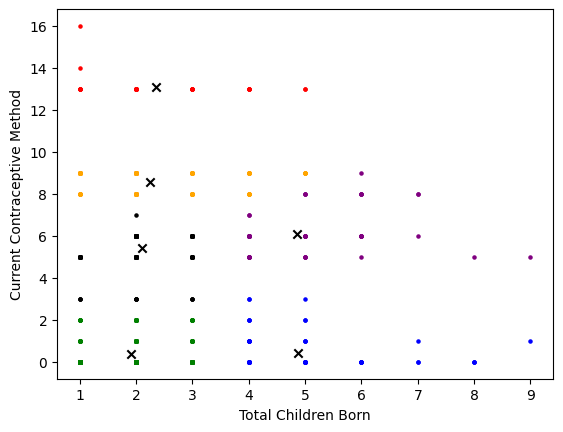

In [ ]:
# Plot the clustered data

colors = ['red','blue','green','orange','purple','black','gray','pink','brown','teal']
for i in range(len(clusters)):
    for j in clusters[i]:
        plt.scatter(df1['x'][j], df1['y'][j],s=5,color=colors[i])
    
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1],color='k', marker='x')
print(centroids)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

# <font size=6>Data Analysis: Association Rule Mining (Apriori Algorithm)</font>

We use Apriori Algorithm to generate frequent itemsets and association rules with specific min support and min confidence levels

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Household Number                  1350 non-null   int64  
 1   State                             1350 non-null   int64  
 2   Place Of Residence                1350 non-null   int64  
 3   Highest Education Level           1350 non-null   float64
 4   Wealth Index Combined             1350 non-null   float64
 5   Total Children Born               1350 non-null   int64  
 6   Age of Respondant at first birth  1350 non-null   float64
 7   Marriage to first birth interval  1350 non-null   float64
 8   Ever had a terminated pregnancy   1350 non-null   float64
 9   Current Contraceptive Method      1350 non-null   int64  
 10  Reason Of Last Discontinuation    1350 non-null   int64  
 11  Heard about family planning       1350 non-null   float64
 12  Anemia

In [ ]:
# Creating a dataframe that contain columns related to Contraception Awarness
# Dropping the Zone Cloumn
df = pd.read_csv('working_dataset.csv')
df.columns=new_column_names
df3 = df[attributes_contraception]
df3 = df3.drop(['Zone'], axis=1)


## Dataframe converted to List
columns = df3.columns
df3 = df3.values
df3 = df3.tolist()


## each item of the list converted from value -> column name + value
for i in df3:
  for j in range(len(i)):
    i[j] = f'{columns[j]} {i[j]}'


# Generated List View
print(df3[0])

['State 1.0', 'Place Of Residence 2.0', 'Highest Education Level 2.0', 'Wealth Index Combined 0.75', 'Total Children Born 2.0', 'Age of Respondant at first birth 26.0', 'Marriage to first birth interval 25.0', 'Current Contraceptive Method 5.0', 'Reason Of Last Discontinuation 2.0', 'Heard about family planning 1.0', 'Husbands Education Level 2.0']


In [ ]:
## generating iterator of the list which is used later 
def GetRecords(df3):

  for a in df3:
    yield(frozenset(a))

data = GetRecords(df3)



In [ ]:
print(type(data))

<class 'generator'>


In [ ]:
import sys
from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


## function that returns all possible subsets of the itemset
def subsets(frequent_itemset):
   
    return chain(*[combinations(frequent_itemset, i + 1) for i, a in enumerate(frequent_itemset)])


## function that returns frequent itemsets from generated candidate itemsets
def returnItemsWithMinSupport(itemSet, transactionList, minsup, freqSet):
       
        frequent_item_set = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minsup:
                        frequent_item_set.add(item)

        return frequent_item_set

In [ ]:
def joinSet(itemSet, length):
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])

In [ ]:
# Function that returns the transaction list and 1-itemsets
def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              
    return itemSet, transactionList


In [ ]:
def apriori(iterartor_data, minsup, minconf):
   
    itemSet, transactionList = getItemSetTransactionList(iterartor_data)
    freqSet = defaultdict(int)
    frequent_item_set = dict()    ## key -> k , value -> list representing that k itemset 
    

    assocRules = dict()
    
    one_frequent_set = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minsup,
                                        freqSet)
    
    #generated frequent itemset
    current_frequent_set = one_frequent_set
    


    k=2
    #generate k frequent itemsets from k-1 itemsets
    while(current_frequent_set != set([])):
        frequent_item_set[k-1] =  current_frequent_set
        current_frequent_set = joinSet( current_frequent_set, k)
        current_candidate_set = returnItemsWithMinSupport(current_frequent_set,
                                                transactionList,
                                                minsup,
                                                freqSet)
        current_frequent_set = current_candidate_set
        k = k + 1


    def getSupport(item):
      return float(freqSet[item])/len(transactionList)
            

    frequent_item_sets = []
    for key, value in frequent_item_set.items():
        frequent_item_sets.extend([(tuple(item), getSupport(item)) for item in value])

    association_rules = []
    for key, value in frequent_item_set.items():
      if not key==0:
        for item in value:
            frequent_subsets = map(frozenset, [x for x in subsets(item)])    ## generating subsets from frquent itemset lists
            for antecedent in frequent_subsets:
                consequent = item.difference(antecedent)                     ## generating antecedant and consequent to generate rules
                if len(consequent) > 0:
                    confidence = getSupport(item)/getSupport(antecedent)
                    if confidence >= minconf:
                        association_rules.append(((tuple(antecedent), tuple(consequent)),  ## adding those rules which have greater confidence than min confindence
                                           confidence))
    return frequent_item_sets, association_rules

Function that generates itemsets and rules for the given data with min support and min confidence levels

In [ ]:
frequent_itemsets, association_rules = apriori(data, 0.2, 0.4)

In [ ]:
# printing all the generated frequent itemsets
for a in frequent_itemsets:
  print(a)

(('Wealth Index Combined 0.0',), 0.21481481481481482)
(('Current Contraceptive Method 0.0',), 0.3496296296296296)
(('Place Of Residence 2.0',), 0.7614814814814815)
(('Husbands Education Level 2.0',), 0.6007407407407407)
(('Total Children Born 1.0',), 0.22296296296296297)
(('Place Of Residence 1.0',), 0.23851851851851852)
(('Heard about family planning 1.0',), 0.5459259259259259)
(('Total Children Born 3.0',), 0.21407407407407408)
(('Reason Of Last Discontinuation 2.0',), 0.4622222222222222)
(('Wealth Index Combined 0.5',), 0.20592592592592593)
(('Wealth Index Combined 0.25',), 0.21851851851851853)
(('Heard about family planning 0.0',), 0.4540740740740741)
(('Highest Education Level 2.0',), 0.5496296296296296)
(('Total Children Born 2.0',), 0.42592592592592593)
(('Heard about family planning 0.0', 'Place Of Residence 2.0'), 0.36148148148148146)
(('Highest Education Level 2.0', 'Place Of Residence 2.0'), 0.4274074074074074)
(('Heard about family planning 0.0', 'Husbands Education Level 2

In [ ]:
# printing all the generated associtaion rules
for a in association_rules:
  rule = a[0]
  antecedent = rule[0]
  consequent = rule[1]
  print(str(antecedent)+' -> '+str(consequent))
  conf = a[1]
  print('Confidence is: '+str(conf))
  print('\n')

('Heard about family planning 0.0',) -> ('Place Of Residence 2.0',)
Confidence is: 0.7960848287112561


('Place Of Residence 2.0',) -> ('Heard about family planning 0.0',)
Confidence is: 0.4747081712062256


('Highest Education Level 2.0',) -> ('Place Of Residence 2.0',)
Confidence is: 0.7776280323450135


('Place Of Residence 2.0',) -> ('Highest Education Level 2.0',)
Confidence is: 0.561284046692607


('Heard about family planning 0.0',) -> ('Husbands Education Level 2.0',)
Confidence is: 0.5611745513866232


('Husbands Education Level 2.0',) -> ('Heard about family planning 0.0',)
Confidence is: 0.42416769420468564


('Reason Of Last Discontinuation 2.0',) -> ('Place Of Residence 2.0',)
Confidence is: 0.7532051282051282


('Place Of Residence 2.0',) -> ('Reason Of Last Discontinuation 2.0',)
Confidence is: 0.4571984435797665


('Husbands Education Level 2.0',) -> ('Heard about family planning 1.0',)
Confidence is: 0.5758323057953144


('Heard about family planning 1.0',) -> ('Husban

# <font size=6>Data Analysis: Regression Analysis (OLS Regression)</font>

In [ ]:
df = pd.read_csv('working_dataset.csv')
df.columns = new_column_names
df5 = df[attributes_contraception]

In [ ]:
# columns related to contraception awarness
df5.columns

Index(['State', 'Place Of Residence', 'Highest Education Level',
       'Wealth Index Combined', 'Total Children Born',
       'Age of Respondant at first birth', 'Marriage to first birth interval',
       'Current Contraceptive Method', 'Reason Of Last Discontinuation',
       'Heard about family planning', 'Husbands Education Level', 'Zone'],
      dtype='object')

In [ ]:
# Creating array of independent and dependent variables from the above dataset
import statsmodels.api as sm
X = df5.copy(deep='True')
# X: independent variable
X = X.drop(columns = ['Wealth Index Combined','Zone'])
df6 = X
Xcpy = X.copy(deep= 'True')
#y: dependent variable
y = df5['Wealth Index Combined']

#convert to numpy
y=y.values
X=X.values

In [ ]:
df6.columns

Index(['State', 'Place Of Residence', 'Highest Education Level',
       'Total Children Born', 'Age of Respondant at first birth',
       'Marriage to first birth interval', 'Current Contraceptive Method',
       'Reason Of Last Discontinuation', 'Heard about family planning',
       'Husbands Education Level'],
      dtype='object')

In [ ]:
# All variables Regression Results
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     97.71
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.28e-151
Time:                        12:33:40   Log-Likelihood:                -117.58
No. Observations:                1350   AIC:                             257.2
Df Residuals:                    1339   BIC:                             314.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4290      0.064      6.663      0.0

In [ ]:
# Removing Variables with p-values higher than 0.05 (threshold)
Xcpy.drop(Xcpy.columns[[4,6,7]],axis=1,inplace=True)

In [ ]:
# final list of independent variables
Xcpy.columns

Index(['State', 'Place Of Residence', 'Highest Education Level',
       'Total Children Born', 'Marriage to first birth interval',
       'Heard about family planning', 'Husbands Education Level'],
      dtype='object')

In [ ]:
X = Xcpy.copy(deep = 'True')
X = X.values

In [ ]:
# Selected variables Regression Results
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     135.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.54e-150
Time:                        12:33:40   Log-Likelihood:                -127.49
No. Observations:                1350   AIC:                             271.0
Df Residuals:                    1342   BIC:                             312.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6228      0.045     13.716      0.0

# <font size=7>Child Health Analysis</font>


# <font size=6>Data Analysis: K-Means Clustering</font>

In [ ]:
## 2D cluster analysis between anaemia level and size of child at birth
columns = ['Highest Education Level','Wealth Index Combined']
df2 = df[columns]
df2.info()
data = df2.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Highest Education Level  1350 non-null   int64  
 1   Wealth Index Combined    1350 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.2 KB


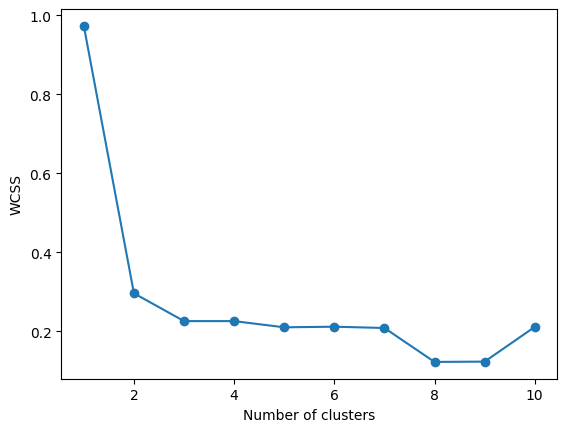

The optimal number of clusters is 6


In [ ]:
# Define a function to calculate the WCSS
def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(data)):
        centroid = centroids[labels[i]]
        distance = np.linalg.norm(data[i] - centroid)
        wcss += distance ** 2
    return wcss / len(data)

#  Compute the WCSS values for a range of cluster numbers
wcss_values = []
for k in range(1, 11):
    centroids = np.random.rand(k, 2)  # Initialize centroids randomly
    labels = np.zeros(len(data), dtype=int)  # Initialize labels as zeros
    for _ in range(10):  # Run k-means for 10 iterations
        # Assign each data point to its closest centroid
        for i in range(len(data)):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)
        # Update the centroids to the mean of their assigned points
        for j in range(k):
            points = data[labels == j]
            if len(points) > 0:
                centroids[j] = np.mean(points, axis=0)
        # Calculate the WCSS for the current iteration
        wcss = calculate_wcss(data, centroids, labels)
    wcss_values.append(wcss)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Identify the elbow point
second_derivatives = np.gradient(np.gradient(wcss_values))
elbow_point = np.argmax(second_derivatives < 1e-4) + 1

# Choose the optimal number of clusters
print(f'The optimal number of clusters is {elbow_point}')

In [ ]:
df2.columns=['x','y']

In [ ]:
# Running K-Means Clustering with desired number of cluster
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

# Define the k-means clustering algorithm
def kmeans(df2, k, iterations=100):
    # Initialize k random centroids
    centroids = []
    for i in range(k):
        centroid = [random.uniform(min(df2[x]), max(df2[x])) for x in df2.columns]
        centroids.append(centroid)
    
    # Perform k-means clustering
    for i in range(iterations):
        # Assign each data point to the nearest centroid
        clusters = {}
        for j in range(k):
            clusters[j] = []
        for index, row in df2.iterrows():
            distances = [math.sqrt(sum([(row[x]-centroids[j][x])**2 for x in range(len(row))])) for j in range(k)]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(index)
        
        # Update the centroids
        for j in range(k):
            if clusters[j]:
                centroids[j] = [sum(df2.iloc[clusters[j]][x])/len(clusters[j]) for x in df2.columns]
    
    # Return the cluster assignments and final centroids
    return clusters, centroids


clusters, centroids = kmeans(df2, elbow_point)

In [ ]:
print(f'Total Points in Dataset {len(df2)}')
for i in range(elbow_point):
  print(f'Cluster {i+1} has {len(clusters[i])} data points')

Total Points in Dataset 1350
Cluster 1 has 52 data points
Cluster 2 has 50 data points
Cluster 3 has 742 data points
Cluster 4 has 224 data points
Cluster 5 has 116 data points
Cluster 6 has 166 data points


[[1.0, 0.6298076923076923], [0.0, 0.635], [2.0, 0.4973045822102426], [3.0, 0.7779017857142857], [1.0, 0.1206896551724138], [0.0, 0.0783132530120482]]
{0: [19, 29, 53, 60, 76, 87, 95, 134, 191, 199, 240, 275, 278, 289, 297, 302, 312, 329, 343, 368, 395, 402, 416, 457, 476, 605, 618, 622, 642, 643, 717, 740, 741, 745, 913, 915, 965, 970, 1019, 1061, 1067, 1068, 1069, 1070, 1087, 1137, 1181, 1184, 1186, 1267, 1323, 1336], 1: [9, 21, 22, 27, 105, 113, 129, 130, 142, 161, 175, 182, 211, 213, 217, 220, 226, 239, 243, 252, 261, 262, 264, 274, 276, 281, 282, 284, 292, 294, 304, 310, 314, 326, 332, 367, 371, 397, 471, 742, 763, 767, 874, 1031, 1066, 1077, 1088, 1090, 1346, 1348], 2: [0, 1, 2, 3, 4, 6, 10, 11, 12, 15, 18, 20, 24, 25, 28, 30, 32, 33, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 51, 54, 57, 58, 62, 63, 65, 66, 67, 68, 72, 73, 74, 75, 77, 78, 79, 80, 81, 85, 88, 89, 90, 91, 93, 94, 97, 100, 104, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 120, 123, 124, 127, 128, 131, 132, 13

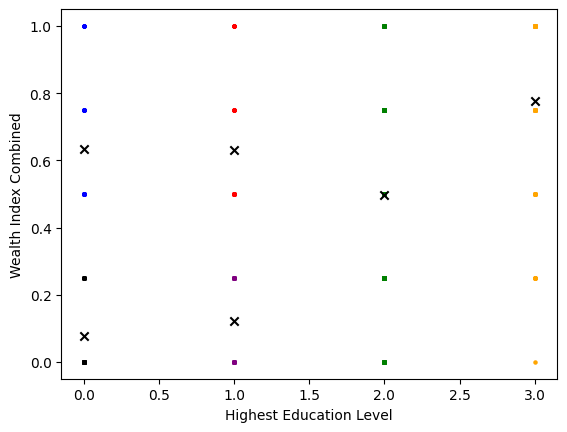

In [ ]:
# Plot the clustered data
colors = ['red','blue','green','orange','purple','black','gray','pink','brown','teal']
for i in range(len(clusters)):
    for j in clusters[i]:
        plt.scatter(df2['x'][j], df2['y'][j],s=5,color=colors[i])
    
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1],color='k', marker='x')

print(centroids)
print(clusters)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

# <font size=6>Data Analysis: Association Rule Mining (Apriori Algorithm)</font>




We use Apriori Algorithm to generate frequent itemsets and association rules with specific min support and min confidence levels

In [ ]:
# Creating a dataframe that contain columns related to Contraception Awarness
# Dropping the Zone Column
df = pd.read_csv('working_dataset.csv')
df.columns = new_column_names
df4 = df[attributes_child_health]
df4 = df4.drop(['Zone'], axis=1)

## Dataframe converted to List
columns = df4.columns
df4 = df4.values
df4 = df4.tolist()

## each item of the list converted from value -> column name + value
for i in df4:
  for j in range(len(i)):
    i[j] = f'{columns[j]} {i[j]}'

# Generated List View
print(df4[0])

['State 1.0', 'Place Of Residence 2.0', 'Highest Education Level 2.0', 'Wealth Index Combined 0.75', 'Total Children Born 2.0', 'Size of Child at Birth 0.0', 'Drink Alcohol 0.0', 'Smokes 0.0', 'Anemia Level 3.0', 'Ever had a terminated pregnancy 0.0', 'Age of Respondant at first birth 26.0', 'Heard about family planning 1.0']


In [ ]:
## generating iterator of the list which is used later 
def GetRecords(df4):
  for a in df4:
    yield(frozenset(a))

data = GetRecords(df4)

Function that generates itemsets and rules for the given data with min support and min confidence levels

In [ ]:
frequent_itemsets, association_rules = apriori(data, 0.4, 0.9)

In [ ]:
# printing all the generated frequent itemsets
for a in frequent_itemsets:
  print(a)

(('Place Of Residence 2.0',), 0.7614814814814815)
(('Ever had a terminated pregnancy 0.0',), 0.8474074074074074)
(('Size of Child at Birth 0.5',), 0.7555555555555555)
(('Drink Alcohol 0.0',), 0.9725925925925926)
(('Anemia Level 4.0',), 0.4237037037037037)
(('Heard about family planning 1.0',), 0.5459259259259259)
(('Smokes 0.0',), 0.997037037037037)
(('Heard about family planning 0.0',), 0.4540740740740741)
(('Highest Education Level 2.0',), 0.5496296296296296)
(('Total Children Born 2.0',), 0.42592592592592593)
(('Ever had a terminated pregnancy 0.0', 'Size of Child at Birth 0.5'), 0.6474074074074074)
(('Highest Education Level 2.0', 'Place Of Residence 2.0'), 0.4274074074074074)
(('Drink Alcohol 0.0', 'Place Of Residence 2.0'), 0.737037037037037)
(('Smokes 0.0', 'Ever had a terminated pregnancy 0.0'), 0.8444444444444444)
(('Smokes 0.0', 'Total Children Born 2.0'), 0.42518518518518517)
(('Drink Alcohol 0.0', 'Heard about family planning 1.0'), 0.5370370370370371)
(('Drink Alcohol 0.0'

In [ ]:
# printing all the generated associtaion rules
for a in association_rules:
  rule = a[0]
  antecedent = rule[0]
  consequent = rule[1]
  print(str(antecedent)+' -> '+str(consequent))
  conf = a[1]
  print('Confidence is: '+str(conf))
  print('\n')

('Place Of Residence 2.0',) -> ('Drink Alcohol 0.0',)
Confidence is: 0.9678988326848248


('Ever had a terminated pregnancy 0.0',) -> ('Smokes 0.0',)
Confidence is: 0.9965034965034966


('Total Children Born 2.0',) -> ('Smokes 0.0',)
Confidence is: 0.9982608695652173


('Heard about family planning 1.0',) -> ('Drink Alcohol 0.0',)
Confidence is: 0.983717774762551


('Heard about family planning 0.0',) -> ('Drink Alcohol 0.0',)
Confidence is: 0.9592169657422511


('Highest Education Level 2.0',) -> ('Drink Alcohol 0.0',)
Confidence is: 0.982479784366577


('Ever had a terminated pregnancy 0.0',) -> ('Drink Alcohol 0.0',)
Confidence is: 0.9720279720279721


('Anemia Level 4.0',) -> ('Drink Alcohol 0.0',)
Confidence is: 0.9772727272727273


('Size of Child at Birth 0.5',) -> ('Smokes 0.0',)
Confidence is: 0.9970588235294118


('Heard about family planning 0.0',) -> ('Smokes 0.0',)
Confidence is: 0.9967373572593801


('Smokes 0.0',) -> ('Drink Alcohol 0.0',)
Confidence is: 0.97325408618127

# <font size=6>Data Analysis: Regression Analysis (OLS Regression)</font>

In [ ]:
df = pd.read_csv('working_dataset.csv')
df.columns = new_column_names
df5 = df[attributes_child_health]

In [ ]:
# columns related to child health
df5.columns

Index(['State', 'Place Of Residence', 'Highest Education Level',
       'Wealth Index Combined', 'Total Children Born',
       'Size of Child at Birth', 'Drink Alcohol', 'Smokes', 'Anemia Level',
       'Ever had a terminated pregnancy', 'Age of Respondant at first birth',
       'Heard about family planning', 'Zone'],
      dtype='object')

In [ ]:
# Creating array of independent and dependent variables from the above dataset
from os import XATTR_REPLACE
import statsmodels.api as sm
X = df5.copy(deep='True')
# X: independent variable
X = X.drop(columns = ['Heard about family planning','Zone'])
df6 = X
Xcpy = X.copy(deep= 'True')
#y: dependent variable
y = df5['Heard about family planning']

#convert to numpy
y=y.values
X=X.values

In [ ]:
df6.columns

Index(['State', 'Place Of Residence', 'Highest Education Level',
       'Wealth Index Combined', 'Total Children Born',
       'Size of Child at Birth', 'Drink Alcohol', 'Smokes', 'Anemia Level',
       'Ever had a terminated pregnancy', 'Age of Respondant at first birth'],
      dtype='object')

In [ ]:
# All variables Regression Results
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     15.04
Date:                Tue, 02 May 2023   Prob (F-statistic):           6.90e-28
Time:                        12:34:04   Log-Likelihood:                -895.40
No. Observations:                1350   AIC:                             1815.
Df Residuals:                    1338   BIC:                             1877.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4370      0.126      3.473      0.0

In [ ]:
# Removing Variables with p-values higher than 0.05 (threshold)
Xcpy.drop(Xcpy.columns[[0,6,7,8,10]],axis=1,inplace=True)

In [ ]:
# final list of independent variables
Xcpy.columns

Index(['Place Of Residence', 'Highest Education Level',
       'Wealth Index Combined', 'Total Children Born',
       'Size of Child at Birth', 'Ever had a terminated pregnancy'],
      dtype='object')

In [ ]:
X = Xcpy.copy(deep = 'True')
X = X.values

In [ ]:
# Selected variables Regression Results
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     27.15
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.13e-30
Time:                        12:34:04   Log-Likelihood:                -896.83
No. Observations:                1350   AIC:                             1808.
Df Residuals:                    1343   BIC:                             1844.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3433      0.087      3.928      0.0